In [1]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


## 0. Чтение и проверка данных

In [2]:
df = pd.read_csv('telecom_churn.csv')

#взгляну на данные
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [4]:
#переведу целевую переменную в инт для минималистичности отображения
df['Churn'] = df['Churn'].astype('int64')

In [5]:
#проверю данные на наличие пропусков
df.isnull().mean()

State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes         0.0
Total eve calls           0.0
Total eve charge          0.0
Total night minutes       0.0
Total night calls         0.0
Total night charge        0.0
Total intl minutes        0.0
Total intl calls          0.0
Total intl charge         0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

В данных пропусков нет.

In [6]:
#запишу категориальные и  количественные признаки
cat = []
num = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

## 1. Первичный анализ данных

In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.06,39.82,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.18,42.37,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.10,13.69,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.78,54.47,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.44,20.07,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.56,9.26,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.98,50.71,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.11,19.92,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.08,4.31,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.87,50.57,23.20,167.00,201.20,235.30,395.00


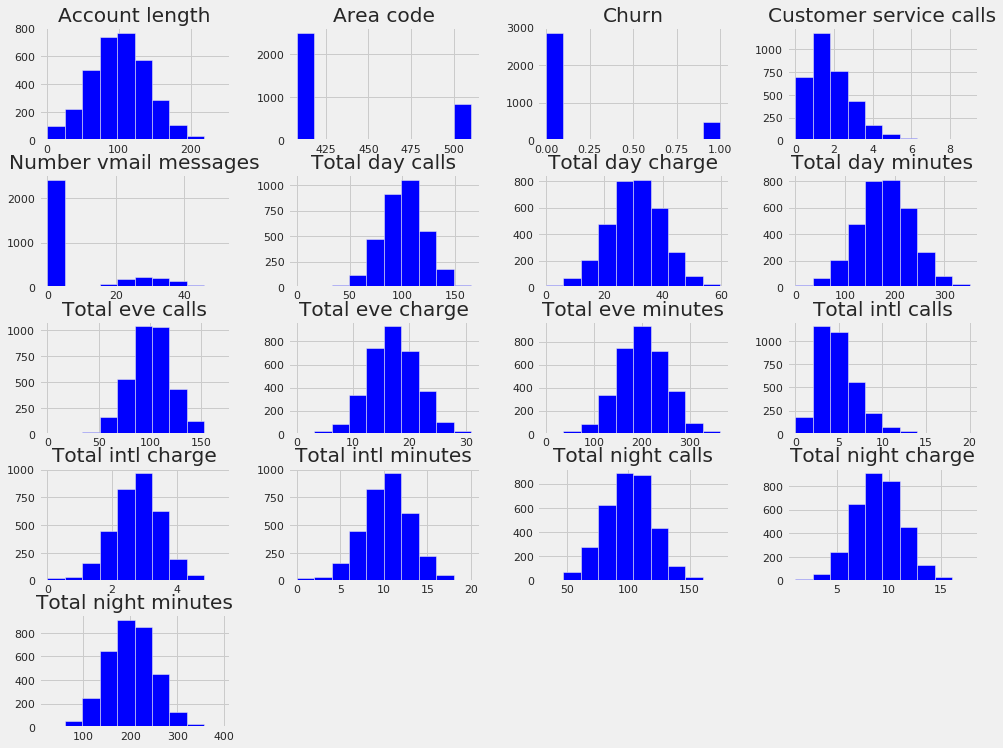

In [8]:
plt.style.use('fivethirtyeight')

df[num].hist(figsize = (15,12), color = 'blue');

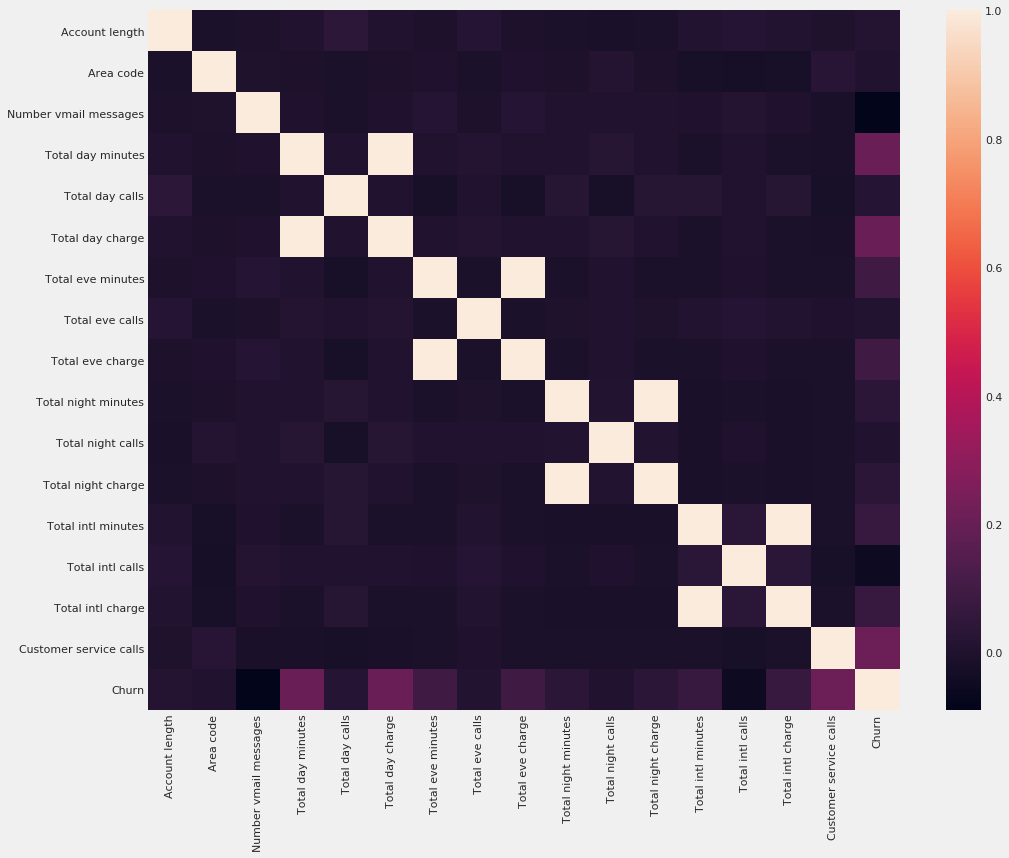

In [9]:
#отображу корр. матрицу
plt.figure(figsize = (15,12))

sns.heatmap(df.corr());

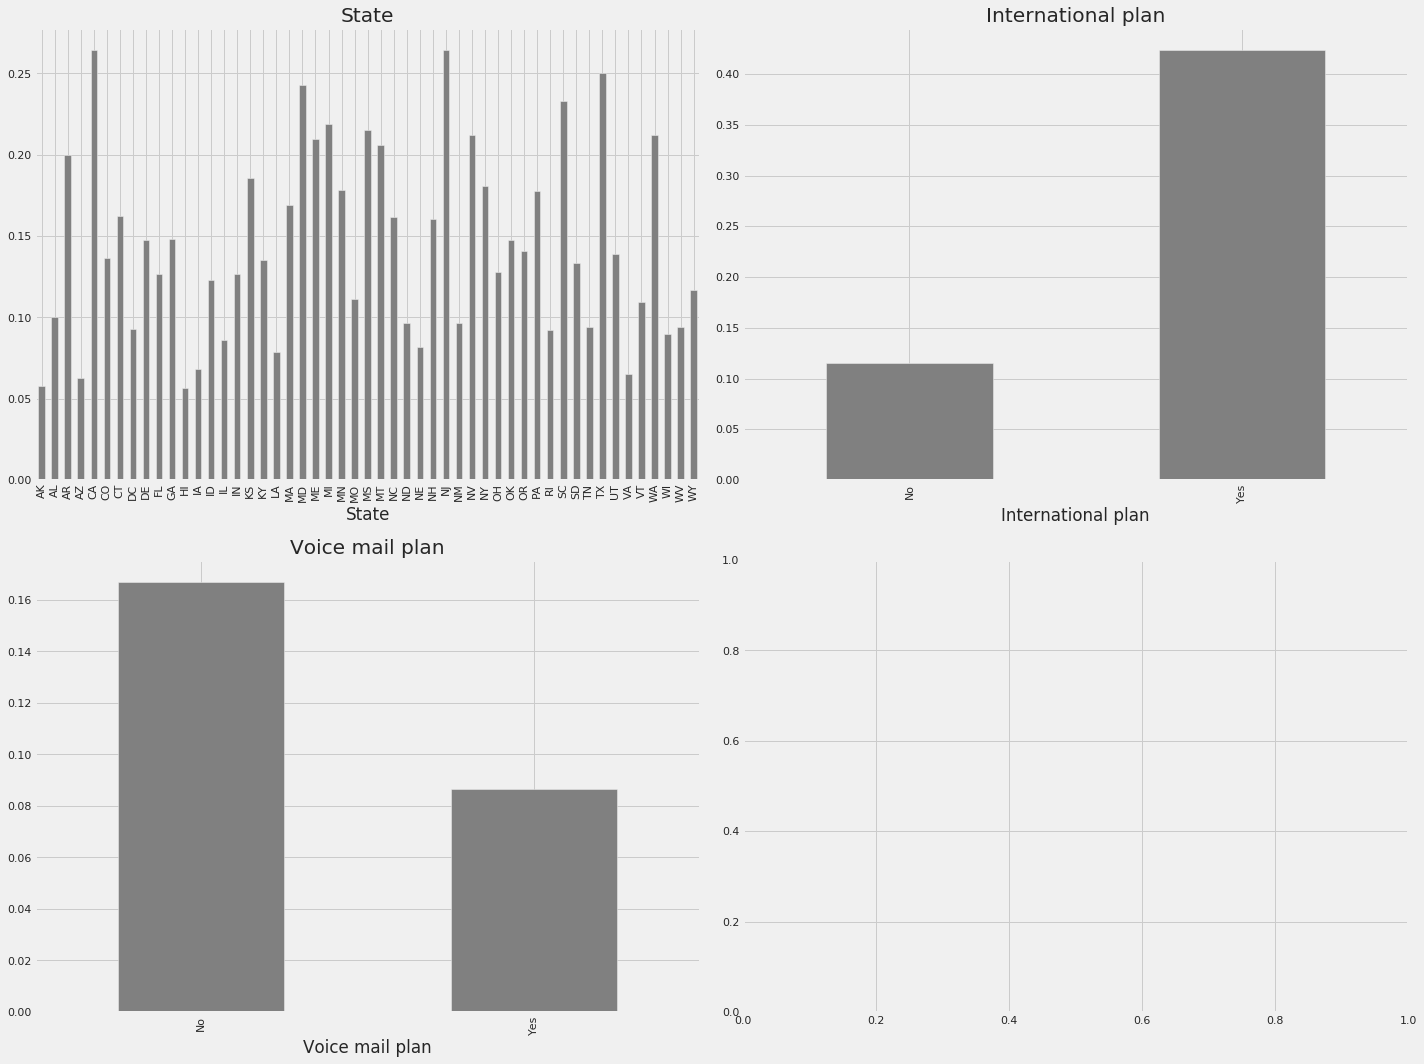

In [10]:
#оценю средний отток по категориальным признакам
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (20,15))

for i in range(len(cat)):
    df.groupby(cat[i])['Churn'].mean().plot(kind = 'bar', color = 'grey', ax = axes[i//2,i%2])
    axes[i//2,i%2].set_title(cat[i])
plt.tight_layout();

Сразу заметна некая зависимость между оттоком и регионом (возможно, зависит от ценовой политики) и наличие услуги международного роуминга.
Построю распределения количественной переменной с разбивкой по ушедшим и лояльным клиентам:

In [11]:
def dist_plot(df, param):
    plt.figure(figsize = (15,5))
    
    sns.kdeplot(df.loc[df['Churn'] == 1, param], label = '1', color = 'red')
    sns.kdeplot(df.loc[df['Churn'] == 0, param], label = '0', color = 'green')
    
    plt.ylabel('Density')
    plt.title(param + ' dist')

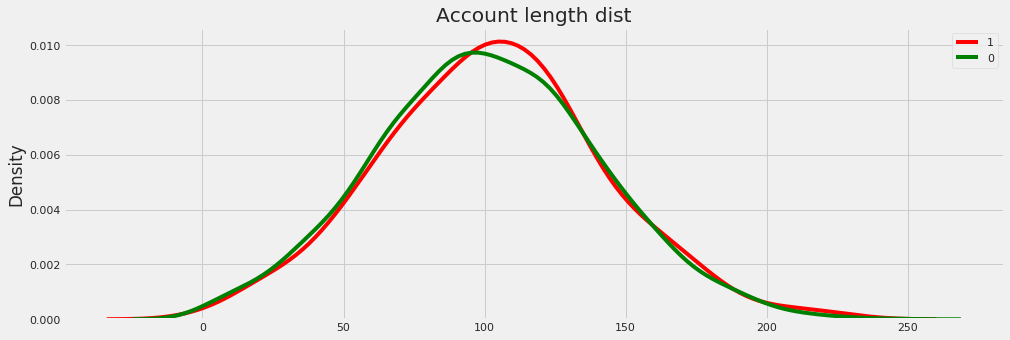

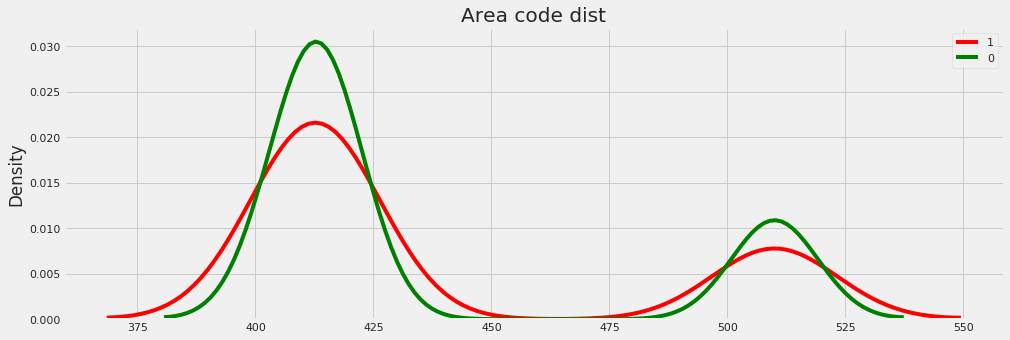

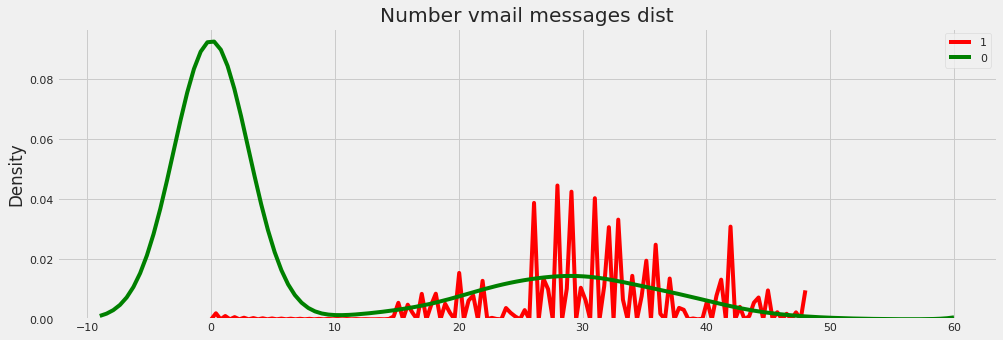

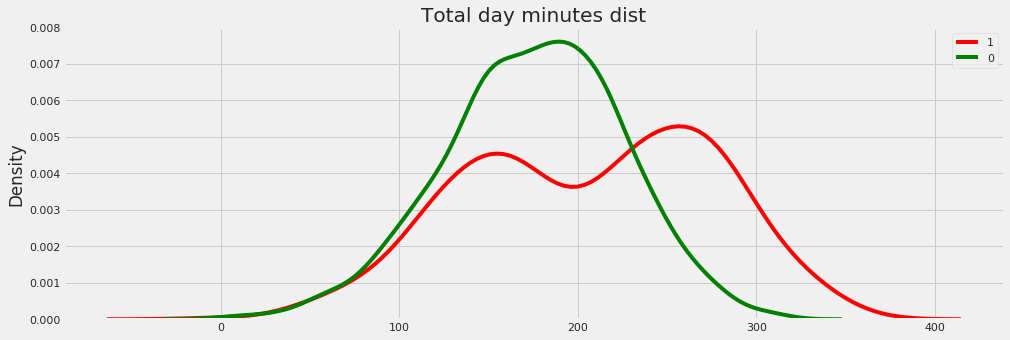

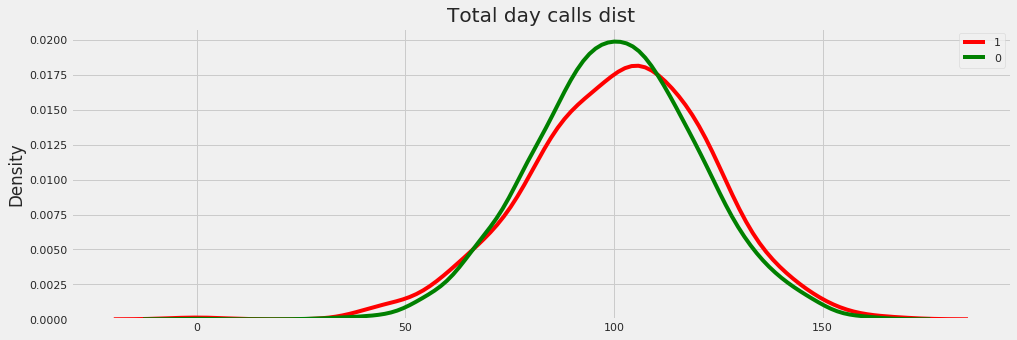

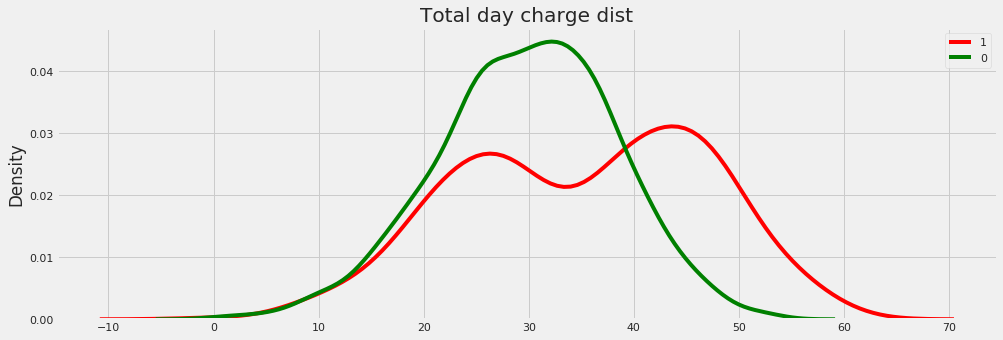

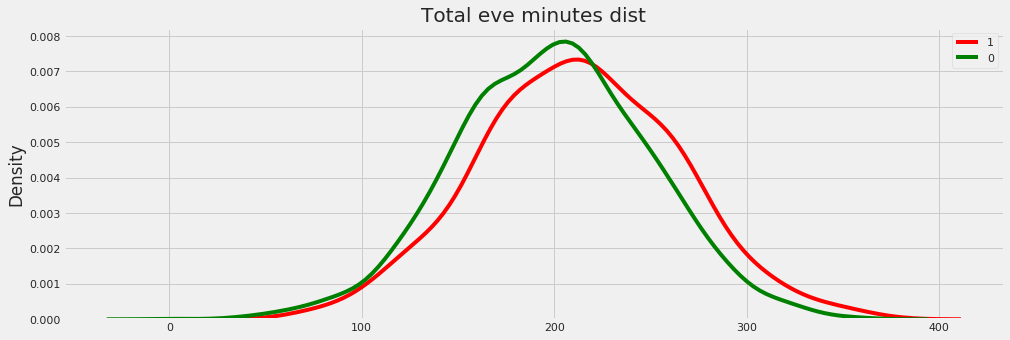

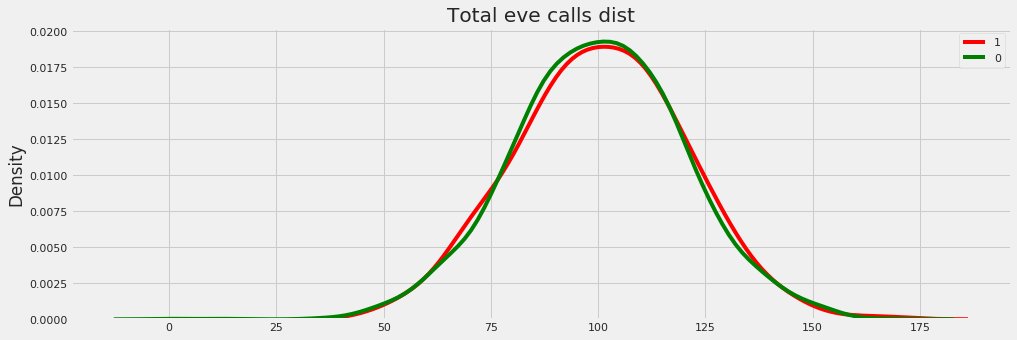

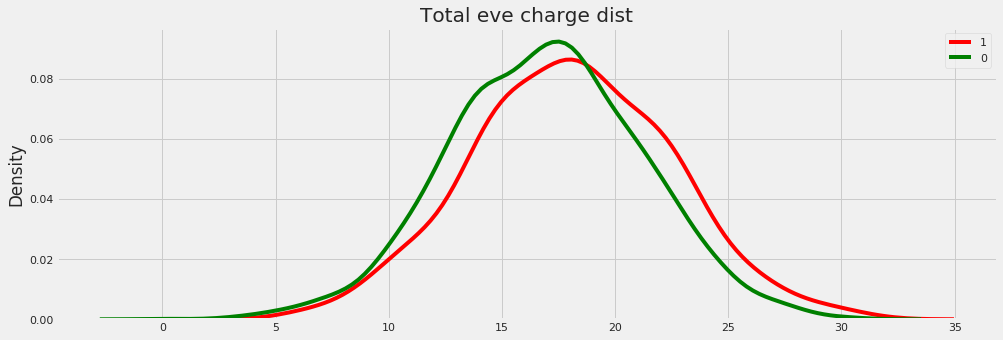

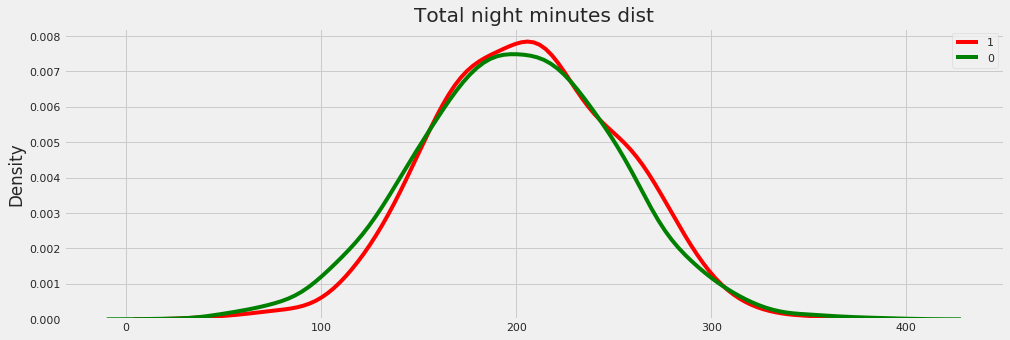

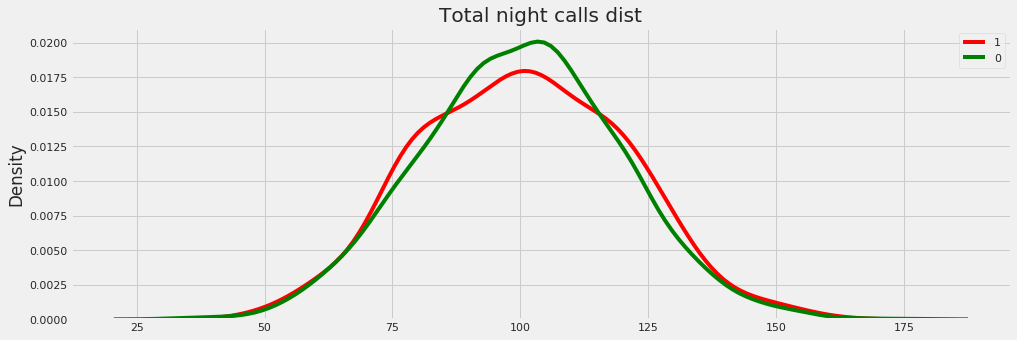

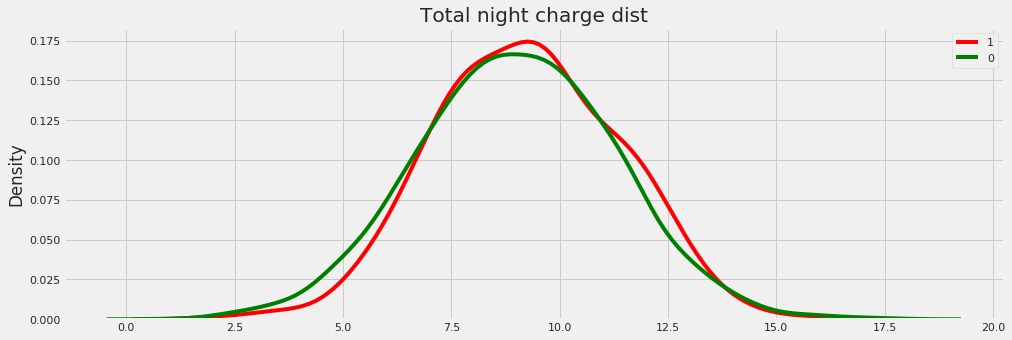

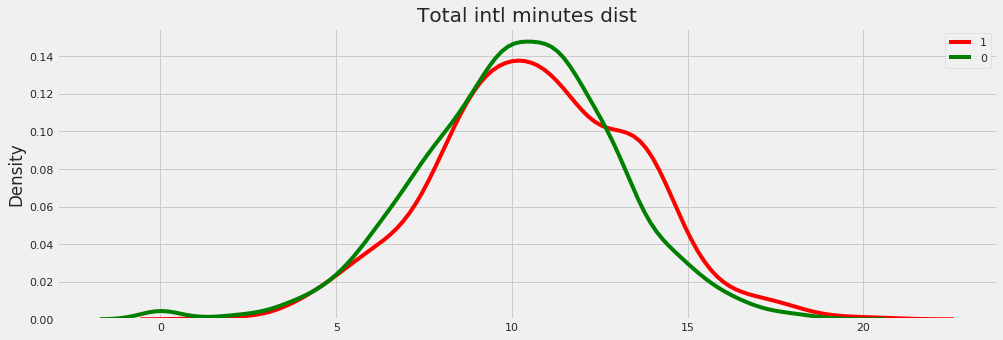

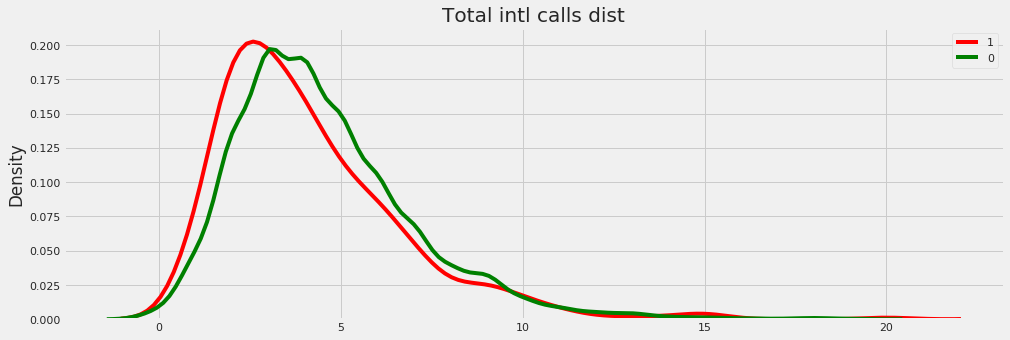

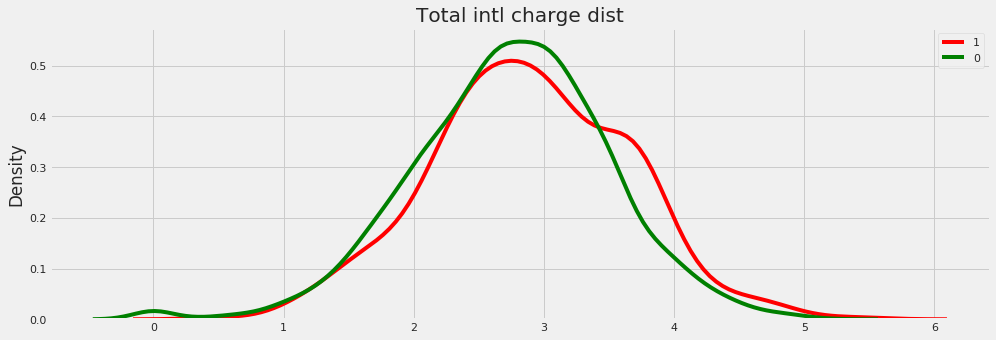

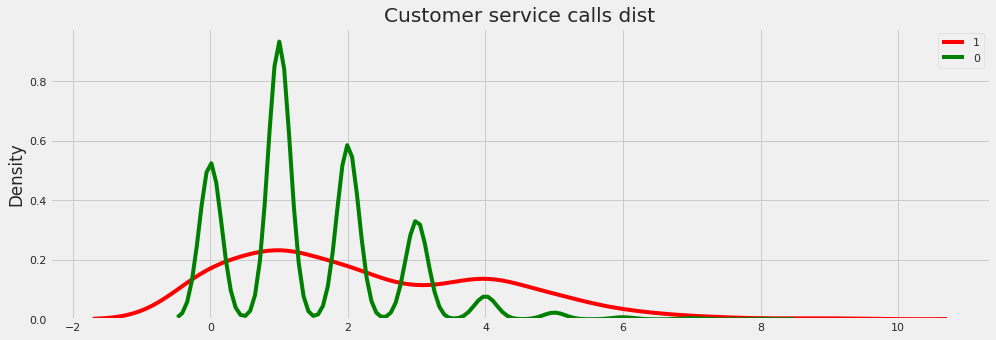

In [12]:
if 'Churn' in num:
    num.remove('Churn')
else:
    pass

for i in range(len(num)):
    dist_plot(df,num[i])

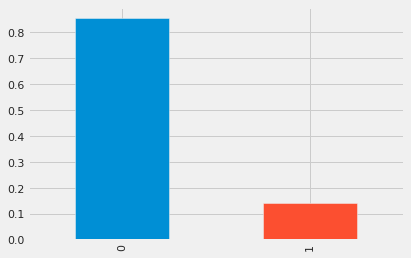

In [13]:
#оценю распределение целевой переменной
df['Churn'].value_counts(normalize = True).plot(kind = 'bar');

Тк налицо дисбаланс классов, в кач-ве метрики выберу roc-auc. Построю первые модели на данных as is, улучшать буду после построения бейзлайна

## 2. Подготовка данных для моделей

In [14]:
#закодирую категориальные переменные

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null int64
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Voice mail plan           3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Chu

In [15]:
rs = 17

X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = rs)

y_train.mean(), y_test.mean()

(0.1448579431772709, 0.145083932853717)

## 3. Построение бейзлайна

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
def fit_model(model):
    model.fit(X_train, y_train)
    pred = model.predict_proba(X_test)[0:,1]
    return roc_auc_score(y_test, pred), accuracy_score(y_test, pred.round())

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


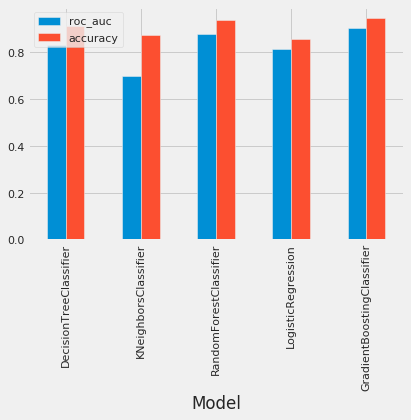

In [18]:
models = [
    DecisionTreeClassifier(random_state = rs),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=rs),
    LogisticRegression(random_state=rs),
    GradientBoostingClassifier(random_state=rs)   
    ]

model_names = []
accuracy = []
roc_auc = []

for model in models:
    m = str(model)
    model_names.append(m[:m.index('(')])
    roc_auc.append(fit_model(model)[0])
    accuracy.append(fit_model(model)[1])
    
base_results = pd.DataFrame({'Model':model_names,
                             'roc_auc':roc_auc,
                             'accuracy':accuracy})
base_results.plot(x = 'Model', y = ['roc_auc', 'accuracy'], kind = 'bar')

In [19]:
base_results.set_index('Model').sort_values(by = 'roc_auc', ascending = False)

,accuracy,roc_auc
Model,,
GradientBoostingClassifier,0.947242,0.903585
RandomForestClassifier,0.940048,0.880270
DecisionTreeClassifier,0.912470,0.832155
LogisticRegression,0.857314,0.814844
KNeighborsClassifier,0.872902,0.698828


Победитель очевиден. Дальнейшие шаги - подбор параметров для бустинга и генерация новых фич.

## Подбор параметров для градиентного бустинга

Тк задачка учебная, подбирать параметры буду с помощью RandomizedSearchCV

In [22]:
gb_params = {
    'n_estimators': np.arange(200,300),
    'max_depth': np.arange(30,50),
    'learning_rate':np.arange(0.1, 0.5, .1),
    'min_samples_leaf': np.arange(20, 30)
    }

gb_grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=rs), param_distributions=gb_params, cv = 5,
                            n_iter = 50, verbose = True, scoring = 'roc_auc', random_state = rs, n_jobs = 8)

fit_model(gb_grid)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   34.7s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:   49.9s finished


(0.906193131107067, 0.9448441247002398)

In [23]:
gb_grid.best_params_

{'learning_rate': 0.4,
 'max_depth': 34,
 'min_samples_leaf': 27,
 'n_estimators': 253}

In [ ]:
#подберу поточнее с помощью GridSearchCV
gb_params = {
    'n_estimators': np.arange(260,280),
    'max_depth': np.arange(30,40),
    'learning_rate':(0.2, 0.5, .1),
    'min_samples_leaf': np.arange(25, 30)
    }

gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=rs), gb_params, cv = 5,
                            verbose = True, scoring = 'roc_auc', n_jobs = 8)

fit_model(gb_grid)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   35.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:  8.0min
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed: 10.4min


In [35]:
feat_importance = pd.DataFrame(X_train.columns, columns = ['features'])
feat_importance['value'] = gb_grid.best_estimator_.feature_importances_
feat_importance.sort_values('value', ascending=False)

,features,value
6,Total day minutes,0.154690
8,Total day charge,0.150106
18,Customer service calls,0.046347
11,Total eve charge,0.038905
9,Total eve minutes,0.036196
12,Total night minutes,0.022934
1,Account length,0.022696
14,Total night charge,0.021610
7,Total day calls,0.020722
10,Total eve calls,0.018111


In [29]:
gb_grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 30,
 'min_samples_leaf': 28,
 'n_estimators': 260}

In [33]:
final_params = gb_grid.best_params_
fit_model(GradientBoostingClassifier(learning_rate= 0.2,
 max_depth= 30,
 min_samples_leaf= 28,
 n_estimators= 260))

(0.9066799578083525, 0.9496402877697842)

Результат не сильно отличается от базовых настроек, но, в целом, неплохой.

## Подбор параметров для RF

In [36]:
fit_model(RandomForestClassifier(random_state=rs))

(0.8802696092636166, 0.9400479616306955)

In [39]:
rf_params = {'n_estimators' : np.arange(0,300),
             'max_depth' : np.arange(1,100),
             'min_samples_leaf': np.arange(1,10),
             'min_samples_split': np.arange(2,10),
             'max_features': [None, 'auto', 'sqrt', 'log2']}

rf_grid = RandomizedSearchCV(RandomForestClassifier(random_state=rs), param_distributions=rf_params, cv=5,
                            n_iter = 100, verbose = True, scoring = 'roc_auc', n_jobs = 8, random_state = rs)

fit_model(rf_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   24.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   54.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  1.0min finished


(0.8992094861660077, 0.935251798561151)

In [40]:
rf_grid.best_params_

{'max_depth': 79,
 'max_features': None,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 157}

In [50]:
rf_params = {'n_estimators' : np.arange(155,162),
             'max_depth' : np.arange(77,82),
             'min_samples_leaf': np.arange(5,10),
             'min_samples_split': np.arange(2,4),
             'max_features': [None, 'auto']}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=rs), rf_params, cv=5,
                         verbose = True, scoring = 'roc_auc', n_jobs = 8)

fit_model(rf_grid)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   47.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:  5.5min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:  7.5min
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:  9.6min
[Parallel(n_jobs=8)]: Done 3500 out of 3500 | elapsed: 10.1min finished


(0.8987458416885931, 0.935251798561151)

In [51]:
rf_grid.best_params_

{'max_depth': 77,
 'max_features': None,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 159}

In [53]:
feat_importance = pd.DataFrame({'feature': list(X_train.columns), 
                               'importance':rf_grid.best_estimator_.feature_importances_})
feat_importance = feat_importance.sort_values('importance', ascending = False)
feat_importance.head(10)

,feature,importance
8,Total day charge,0.161588
18,Customer service calls,0.152194
6,Total day minutes,0.145261
16,Total intl calls,0.088444
3,International plan,0.078968
11,Total eve charge,0.075273
9,Total eve minutes,0.071413
15,Total intl minutes,0.049389
17,Total intl charge,0.046052
5,Number vmail messages,0.030950


## Создание новых признаков

In [54]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Добавлю признак "цена минуты" разговора.

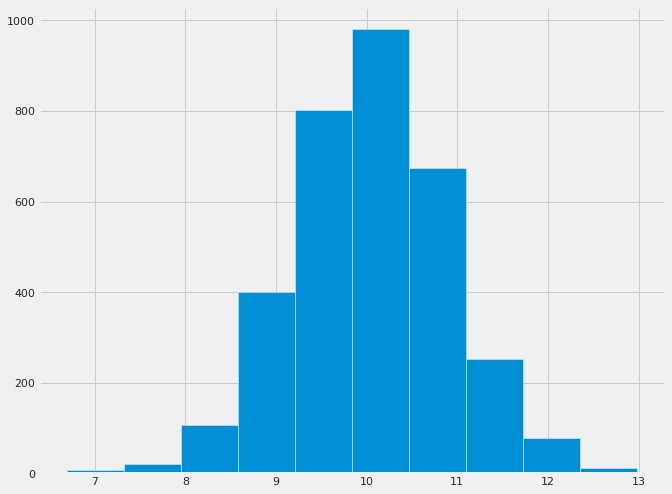

In [105]:
df['Minute cost'] = (df['Total day charge'] + 
                        df['Total eve charge'] +
                        df['Total night charge'] +
                        df['Total intl charge']) / (df['Total day minutes'] + 
                                                    df['Total eve minutes'] +
                                                    df['Total night minutes'] +
                                                    df['Total intl minutes'])

df['Minute cost']  = (df['Minute cost']*100).round(4)
df['Minute cost'].hist()

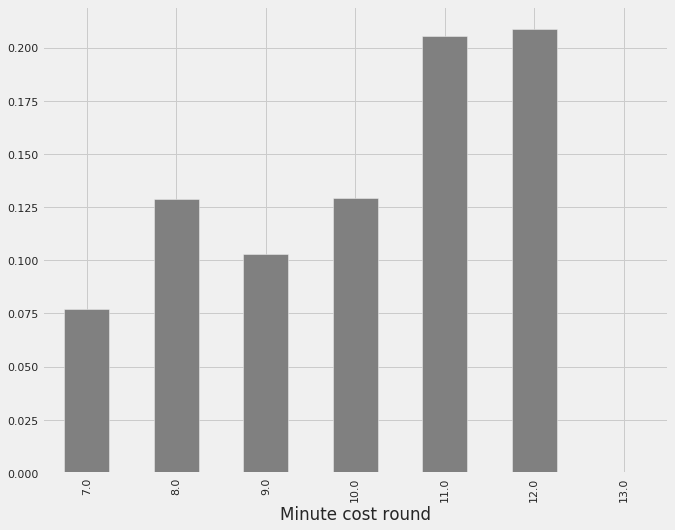

In [106]:
df['Minute cost round'] = df['Minute cost'].round()
df.groupby('Minute cost round')['Churn'].mean().plot(kind = 'bar', color = 'grey');

In [108]:
df.drop('Minute cost round', axis = 1, inplace=True)

In [114]:
df['Total charge'] = (df['Total day charge']+
                        df['Total eve charge']+
                        df['Total night charge']+
                        df['Total intl charge'])
            
df['day charge part'] = df['Total day charge']/df['Total charge']
df['eve charge part'] = df['Total eve charge']/df['Total charge']
df['night charge part'] = df['Total night charge']/df['Total charge']
df['intl charge part'] = df['Total intl charge']/df['Total charge']

In [116]:
charge_parts = []
for i in df.columns:
    if 'charge part' in i:
        charge_parts.append(i)

In [123]:
def dist_plot(df,param):
    plt.figure(figsize = (15,5))
    sns.kdeplot(df.loc[df['Churn'] == 1, param], label = 1, color = 'red')
    sns.kdeplot(df.loc[df['Churn'] == 0, param], label = 0, color = 'green')
    plt.ylabel('Density')
    plt.title(param+' dist')

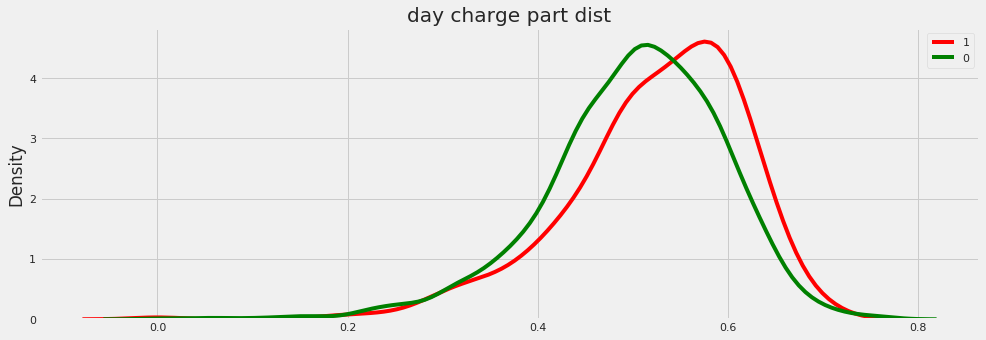

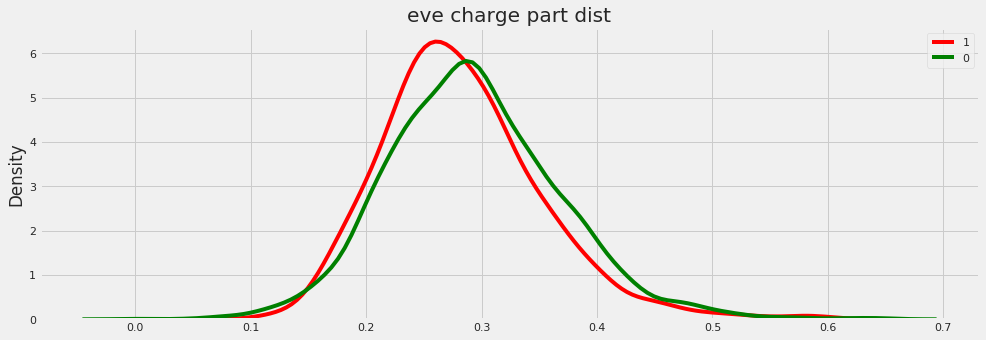

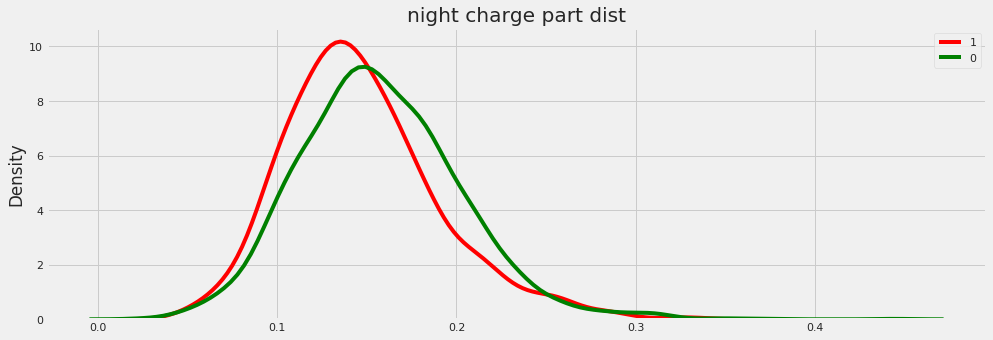

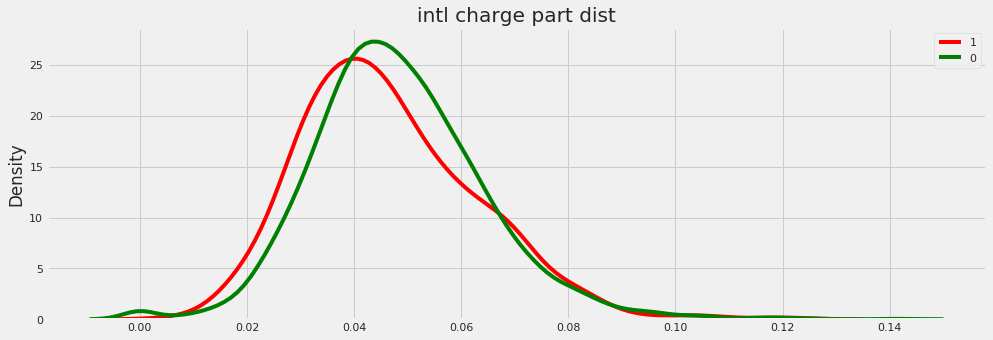

In [124]:
for i in range(len(charge_parts)):
    dist_plot(df, charge_parts[i])

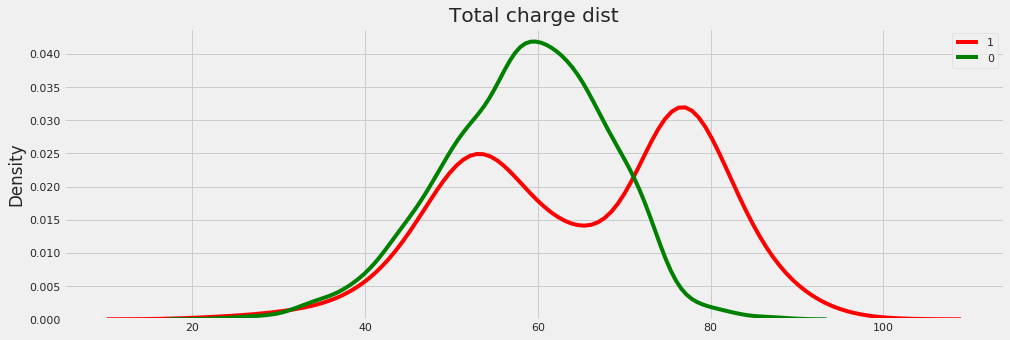

In [126]:
dist_plot(df, 'Total charge')

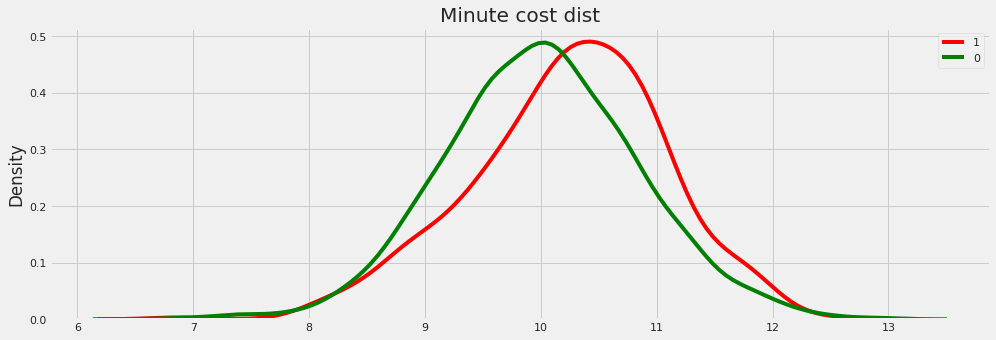

In [127]:
dist_plot(df, 'Minute cost')

In [130]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state = rs)

y_train.mean(), y_test.mean()

(0.1448579431772709, 0.145083932853717)

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


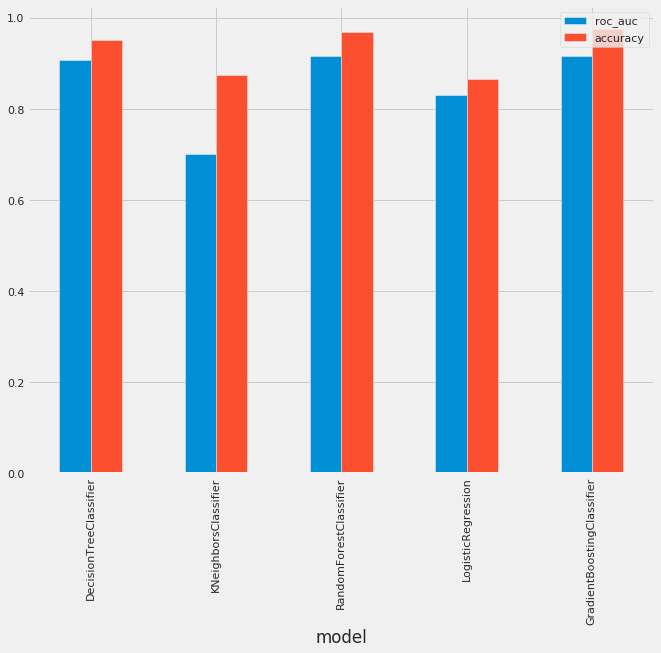

In [131]:
model_names2 = []
roc_auc2 = []
accuracy2 = []

for model in models:
    m = str(model)
    model_names2.append(m[:m.index('(')])
    roc_auc2.append(fit_model(model)[0])
    accuracy2.append(fit_model(model)[1])
    
base2 = pd.DataFrame({'model': model_names2, 'roc_auc': roc_auc2, 'accuracy': accuracy2})
figsize = (12,10)
base2.plot(x = 'model', y = ['roc_auc', 'accuracy'], kind = 'bar')

In [133]:
base2.set_index('model').sort_values(by='roc_auc', ascending = False)

,accuracy,roc_auc
model,,
GradientBoostingClassifier,0.976019,0.916950
RandomForestClassifier,0.968825,0.916637
DecisionTreeClassifier,0.952038,0.906761
LogisticRegression,0.864508,0.831129
KNeighborsClassifier,0.875300,0.701691


Видно, что добавление новых признаков улучшило результат даже на дефолтных параметрах. Подберу для градиентного бустинга:

In [154]:
gb_params = {
    'n_estimators': np.arange(10,300),
    'max_depth': np.arange(1,50),
    'learning_rate':np.arange(0.1, 0.5, .1),
    'min_samples_leaf': np.arange(1, 30)
    }

gb_grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=rs), param_distributions=gb_params, cv = 5,
                            n_iter = 100, verbose = True, scoring = 'roc_auc', random_state = rs, n_jobs = 8)

fit_model(gb_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   30.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  1.3min finished


(0.9224902344881944, 0.9772182254196643)

In [155]:
gb_grid.best_params_

{'learning_rate': 0.30000000000000004,
 'max_depth': 15,
 'min_samples_leaf': 12,
 'n_estimators': 264}

In [158]:
gb_params = {
    'n_estimators': np.arange(260,270),
    'max_depth': np.arange(10,20),
    'learning_rate':np.arange(0.1, 1, .1),
    'min_samples_leaf': np.arange(10, 20)
    }

gb_grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=rs), param_distributions=gb_params, cv = 5,
                            n_iter = 100, verbose = True, scoring = 'roc_auc', random_state = rs, n_jobs = 8)

fit_model(gb_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   19.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   46.8s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   54.2s finished


(0.9289233016123237, 0.9772182254196643)

In [159]:
gb_grid.best_params_

{'learning_rate': 0.8,
 'max_depth': 19,
 'min_samples_leaf': 19,
 'n_estimators': 264}

In [165]:
feat_imp = pd.DataFrame({'features': X_train.columns, 'importances': gb_grid.best_estimator_.feature_importances_})
feat_imp = feat_imp.set_index('features').sort_values(by='importances', ascending = False)
feat_imp.head(30)

,importances
features,
Total charge,0.008207
Total night calls,0.004519
Total day calls,0.004074
Number vmail messages,0.003508
night charge part,0.003459
Account length,0.003389
Total eve calls,0.003304
Total intl minutes,0.003142
State,0.003109
